# **Final Project Based Learning 03**
# *Data Science*

**Shahrizal**

# **CONTEXT**

*League* of Legends adalah MOBA (Multiplayer Online Battle Arena) di mana dalam permainannya terdapat 2 tim (biru dan merah) yang saling berhadapan. Dalam satu laga permainan, ada 3 jalur yang dijadikan medan perang, hutan dan pemainnya terbagi jadi 5 peran. Tujuan permainan ini adalah menjatuhkan Nexus atau base musuh dan memenangkan permainan.


# **GLOSSARY**

- Warding totem: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan.
- Minions: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan.
- Jungle minions: NPC milik NO TEAM. Mereka memberi emas dan buff saat dibunuh oleh pemain.
- Elite monsters: Monster dengan hp/damage tinggi yang memberikan bonus besar (gold/XP/stat) saat dibunuh oleh tim.
- Dragons: Monster elit yang memberikan bonus tim saat terbunuh. Naga ke-4 yang dibunuh oleh tim memberikan bonus statistik yang sangat besar. The - - 5th dragon (Elder Dragon) menawarkan keuntungan besar bagi tim.
- Herald: Monster elit yang memberikan bonus statistik saat dibunuh oleh pemain. Ini membantu untuk mendorong jalur dan menghancurkan struktur.
- Towers: Struktur yang harus Anda hancurkan untuk mencapai Nexus musuh. Mereka memberi emas.
- Level: Champion level. Mulai dari 1. Maksimal 18.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Import Data
hd = pd.read_csv('/content/high_diamond_ranked_10min.csv')

# Drop Fitur

Drop fitur gameId, blueFirsBlood dan redFirstBlood karena keduanya berisi numerik 1 dan 0 serta berisi identitas.
keduanya juga kurang berasosiasi terhadap beberapa fitur yang lain dan juga winning game.  

In [ ]:
df = hd.drop(['gameId', 'blueFirstBlood', 'redFirstBlood'], axis=1)

# **Exploratory Data Analysis (EDA)**

Pada bagian ini data yang telah disusun menjadi dua bagian, yakni blue dan red. EDA dapat secara langsung divisualisasikan melalui boxplot dan histogram, untuk mendapatkan insight dari *measure of central tendency,* *measure of variability,* dan *outliers detection.*

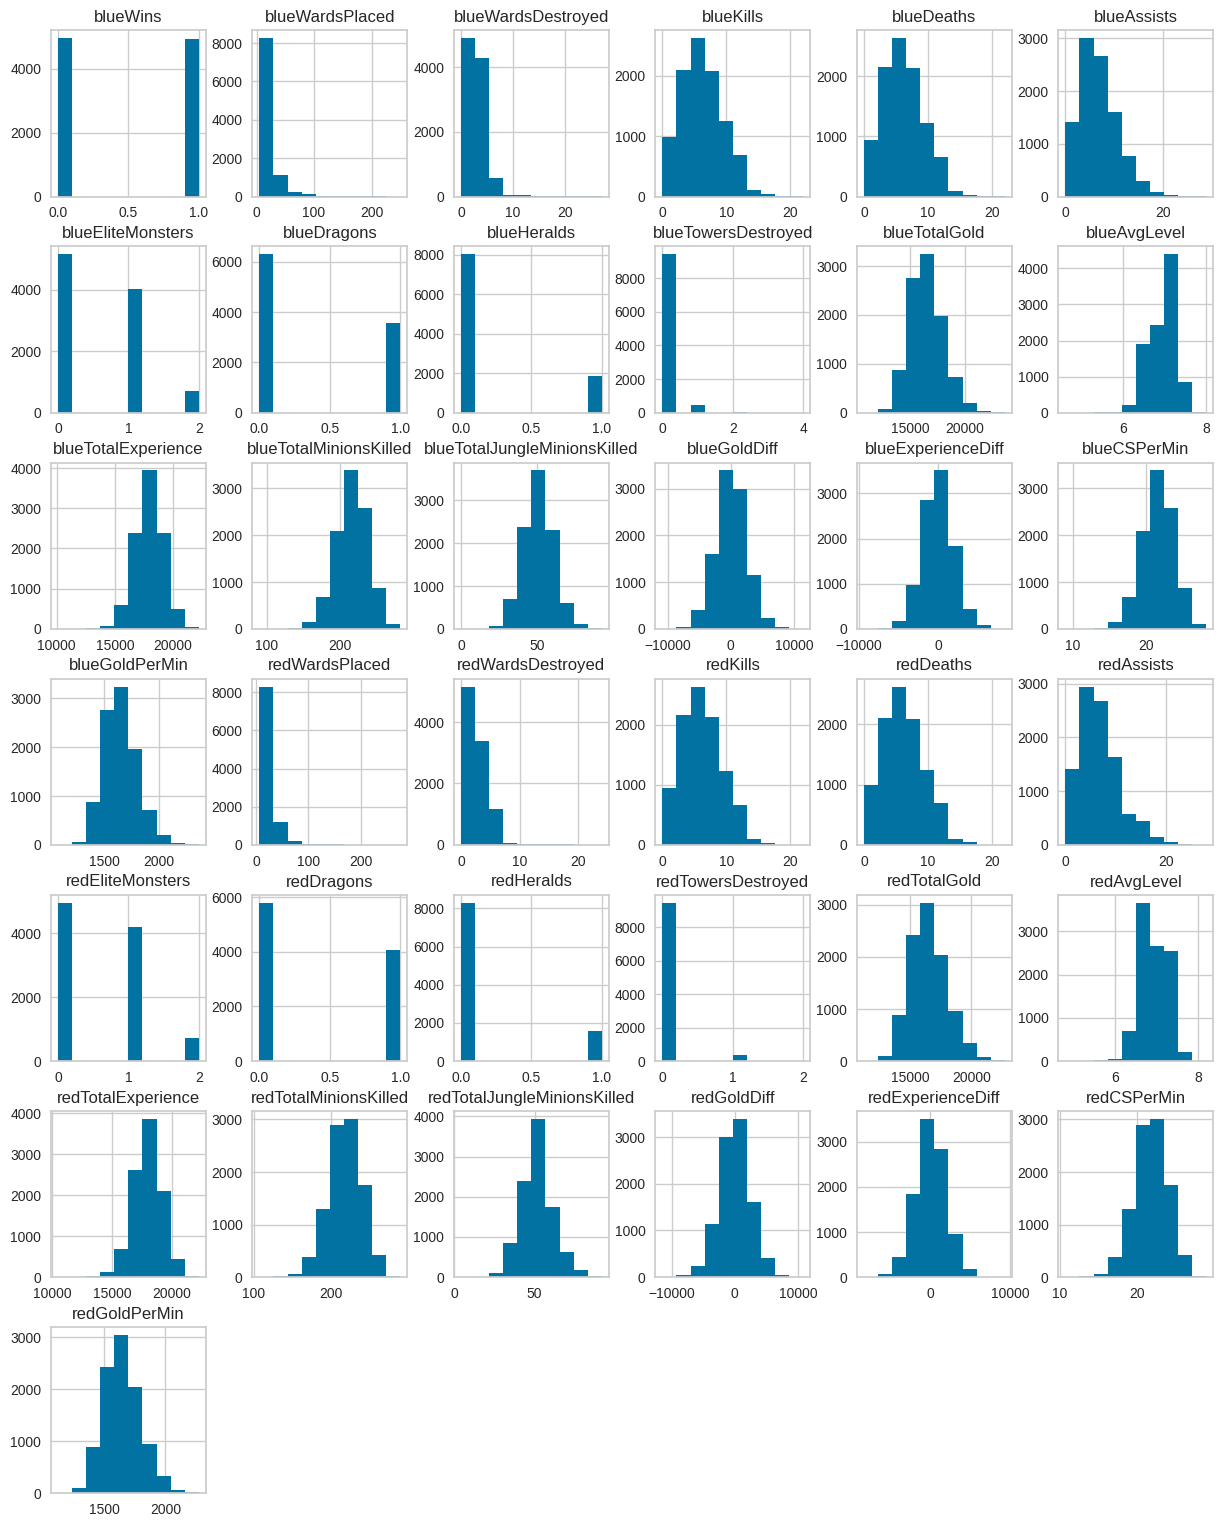

In [ ]:
# Menampilkan histogram distribusi variabel numerik dalam dataset
df.hist(figsize=(15,19))
plt.show()

# **Feature Eengineering**

Penanganan Outlier dan data tak normal dilakukan pada tahap ini. Penanganan Outlier dapat dilakukan melalui IQR, DBscan dan lain-lain. Namun, teknik IQR yang paling umum dan mudah diterapkan.

Sebelum melakukan handling outlier dan feature engineering lainnya, data perlu displit menjadi train dan test agar tidak terjadi *leakage data*.

In [ ]:
# proses training
# split data menjadi training dan test data
# Import bebetapa library
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn.model_selection as ms

# **Split data Training dan Testing**

In [ ]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [ ]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat function sendiri dengan perintah def
# Hal ini diberlakukan  untuk membuat histogram, plot Q-Q, BoxPlot yang merujuk pada Pendekatan statistik

def plot_diagnosa(df, X):
    # fungsi mengambil data frame yang diberi nama df dan
    # X yang dideklarasikan sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[X], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[X], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # Box Plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[X])
    plt.title('Boxplot')

    plt.show()

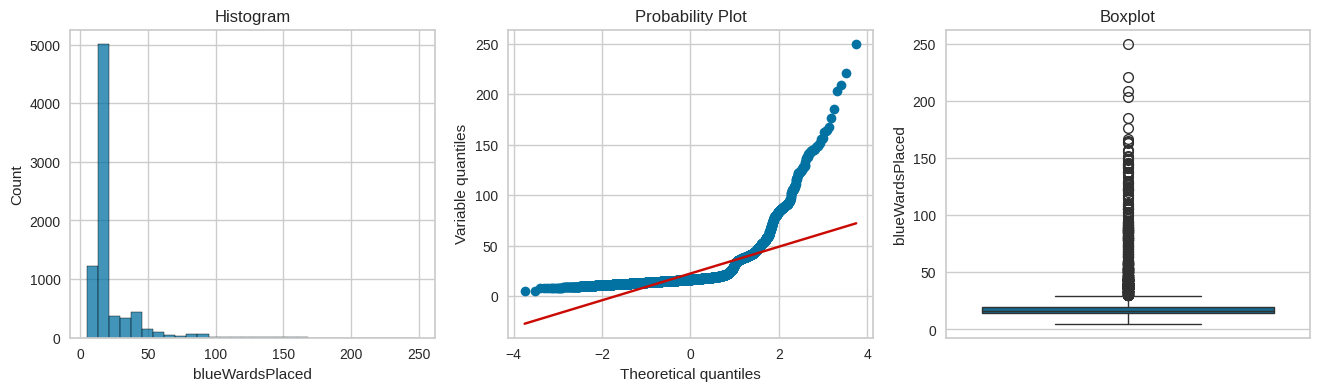

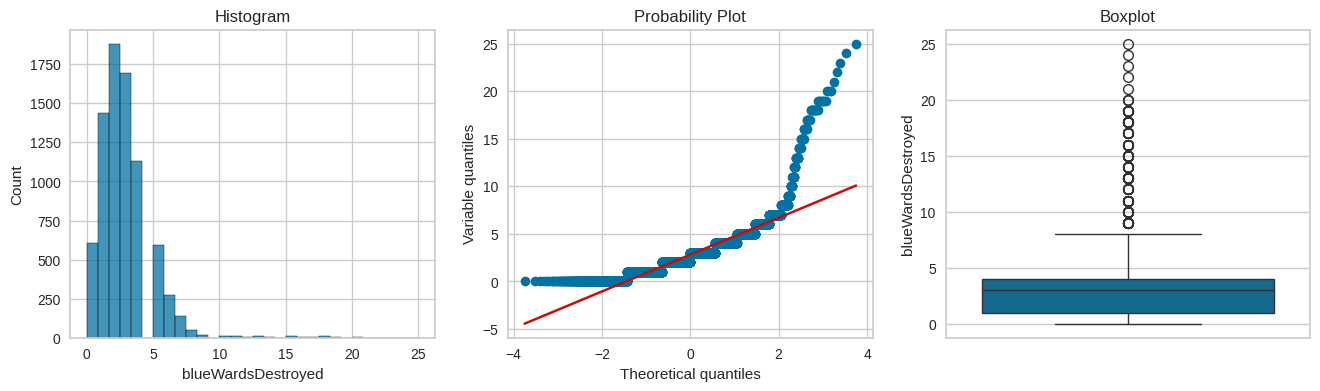

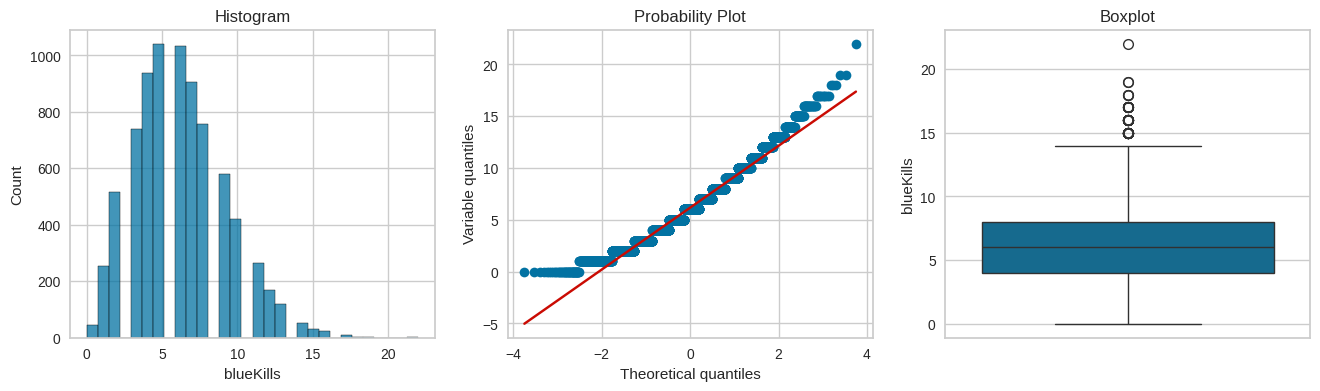

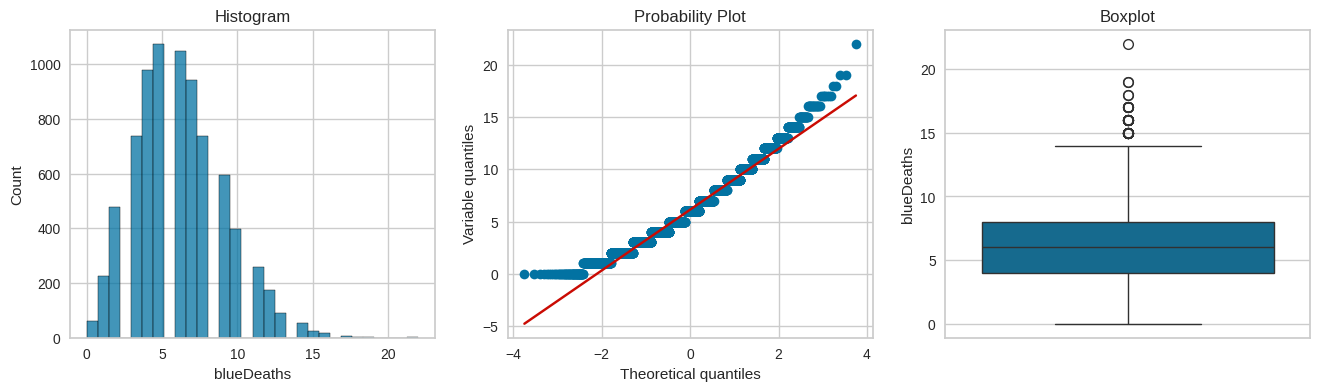

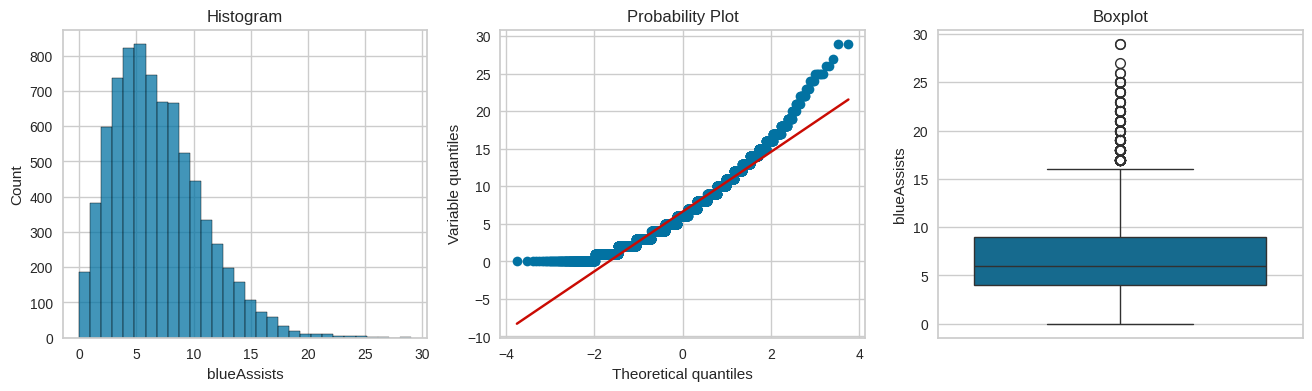

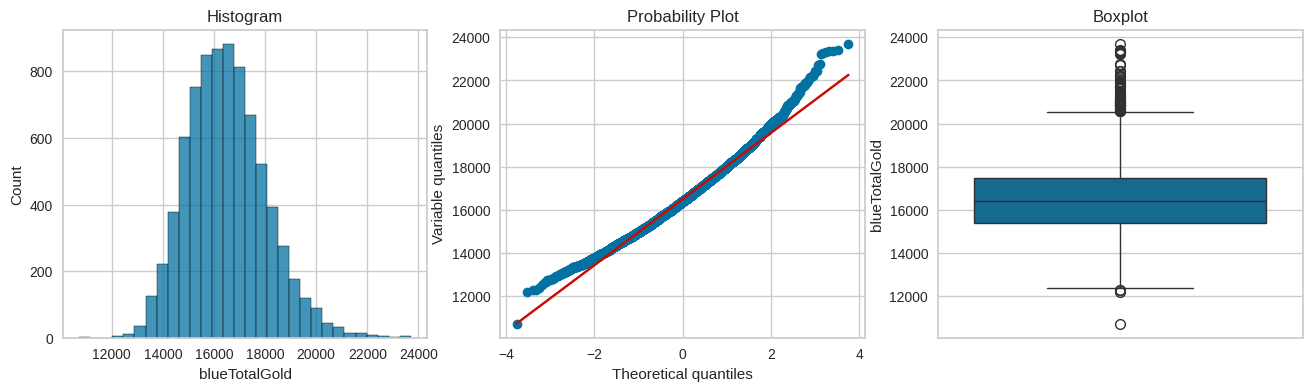

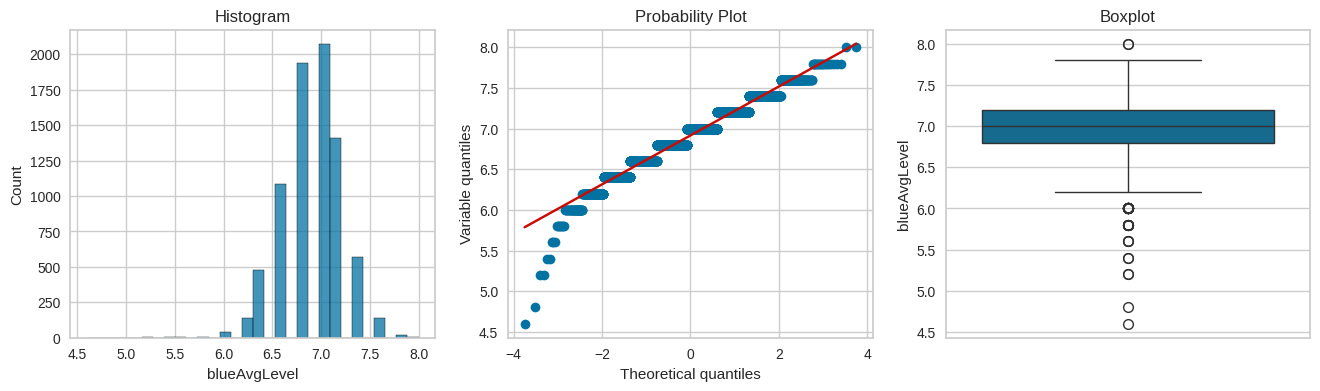

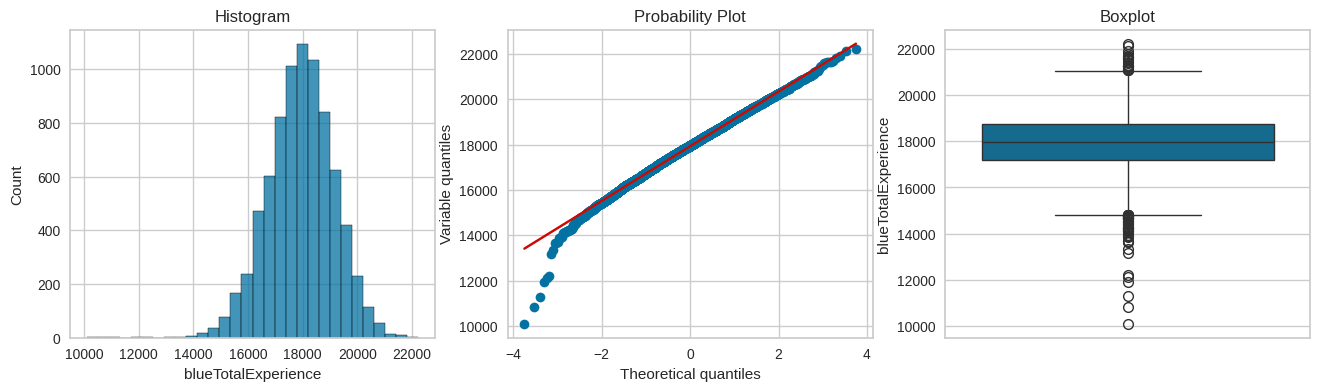

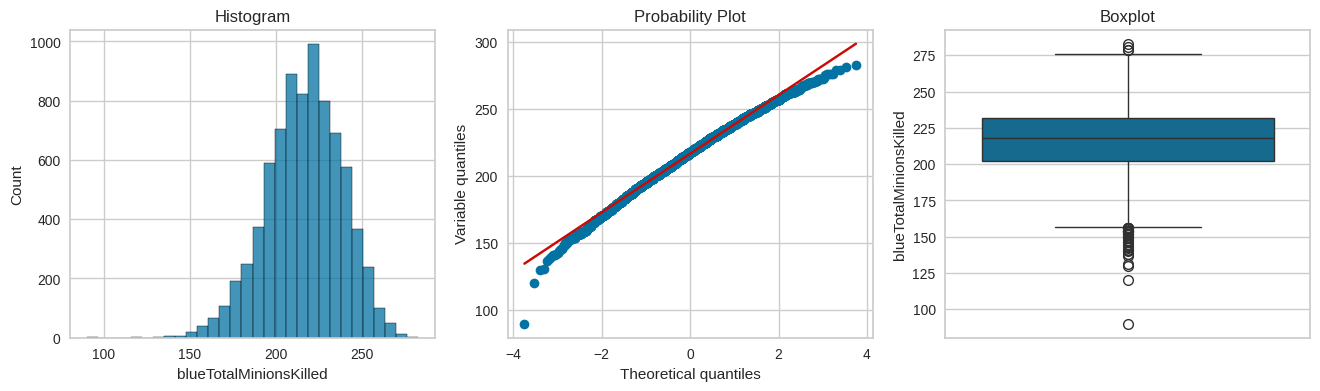

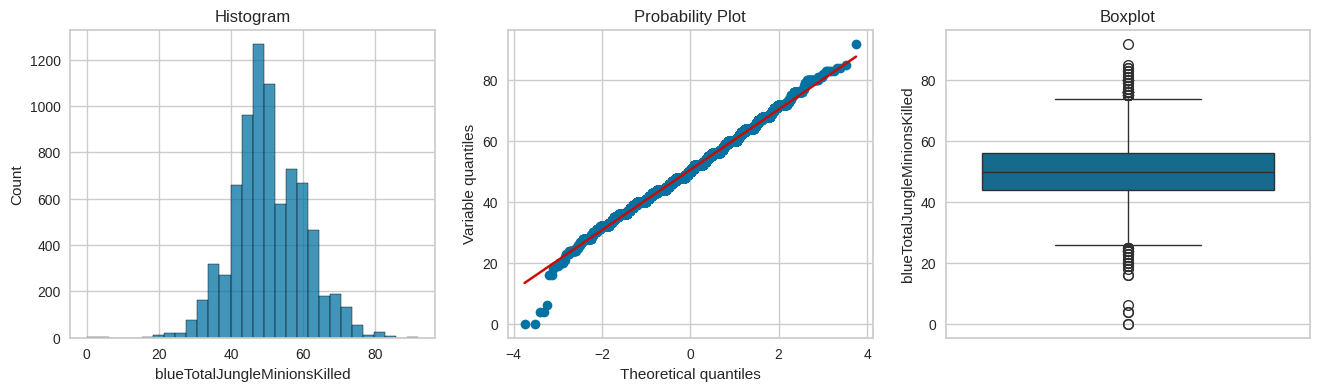

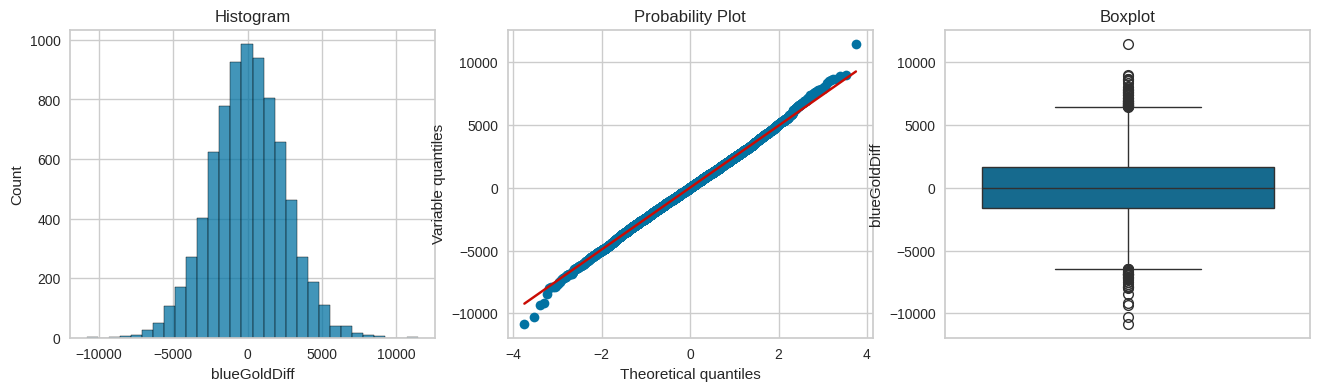

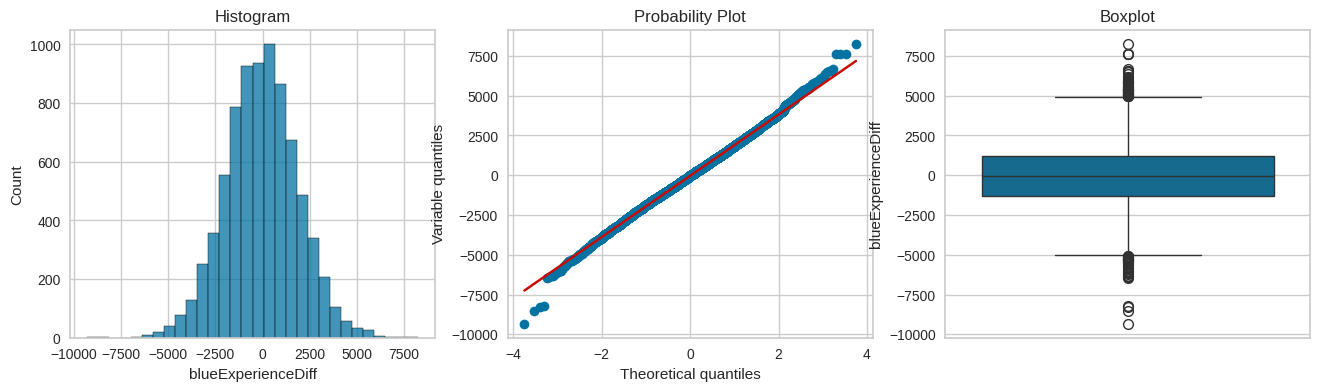

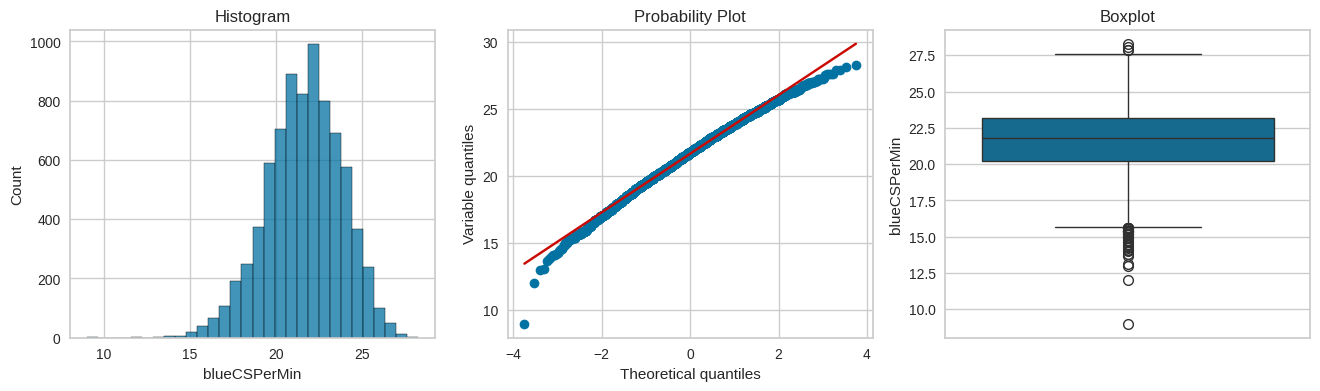

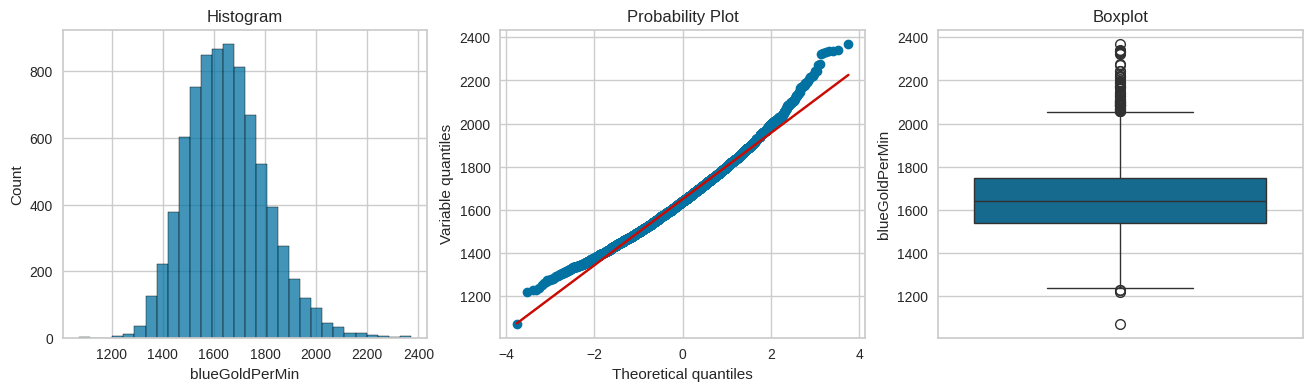

In [ ]:
# 1. Outlier detection

plot_diagnosa(X_train, 'blueWardsPlaced')
plot_diagnosa(X_train, 'blueWardsDestroyed')
plot_diagnosa(X_train, 'blueKills')
plot_diagnosa(X_train, 'blueDeaths')
plot_diagnosa(X_train, 'blueAssists')
plot_diagnosa(X_train, 'blueTotalGold')
plot_diagnosa(X_train, 'blueAvgLevel')
plot_diagnosa(X_train, 'blueTotalExperience')
plot_diagnosa(X_train, 'blueTotalMinionsKilled')
plot_diagnosa(X_train, 'blueTotalJungleMinionsKilled')
plot_diagnosa(X_train, 'blueGoldDiff')
plot_diagnosa(X_train, 'blueExperienceDiff')
plot_diagnosa(X_train, 'blueCSPerMin')
plot_diagnosa(X_train, 'blueGoldPerMin')

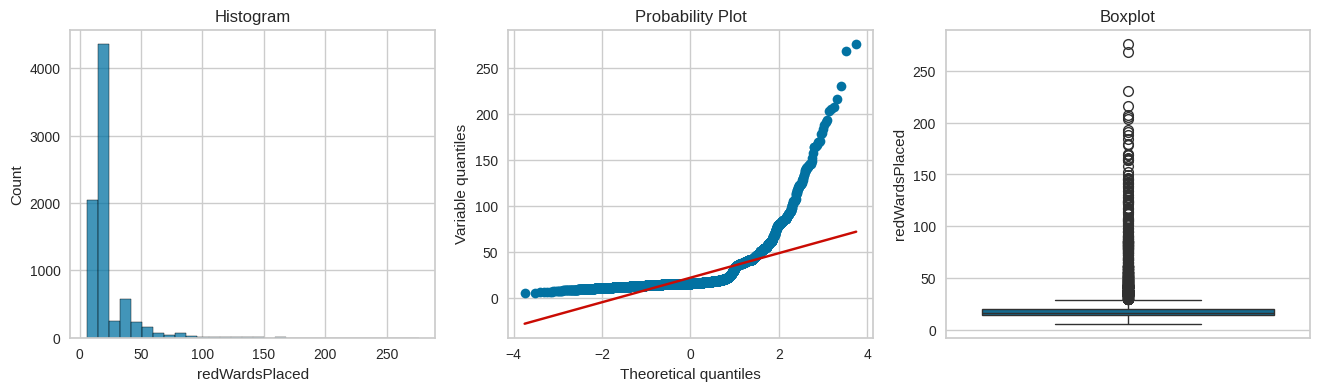

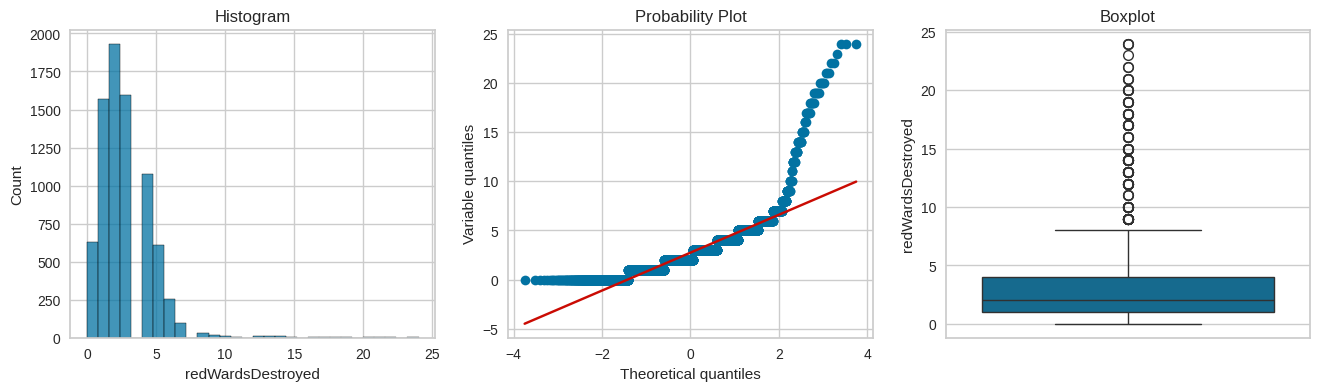

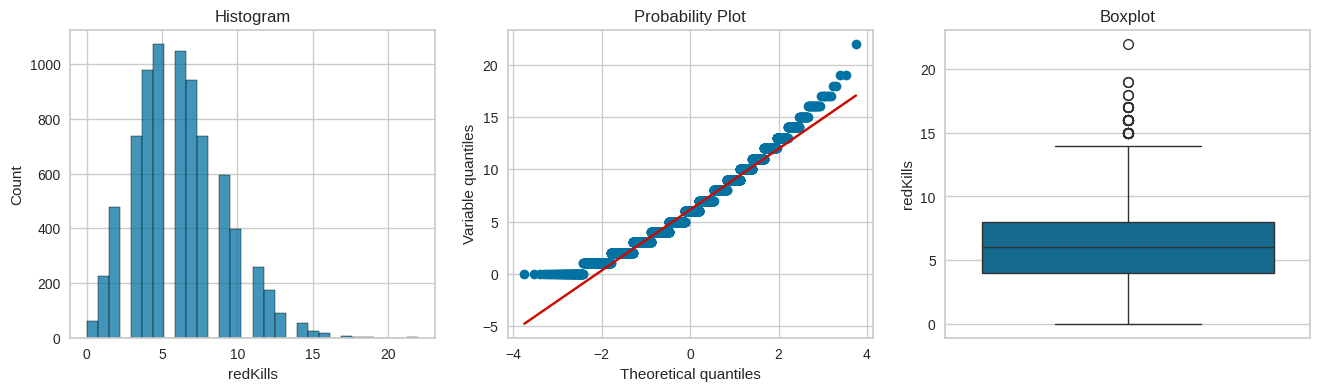

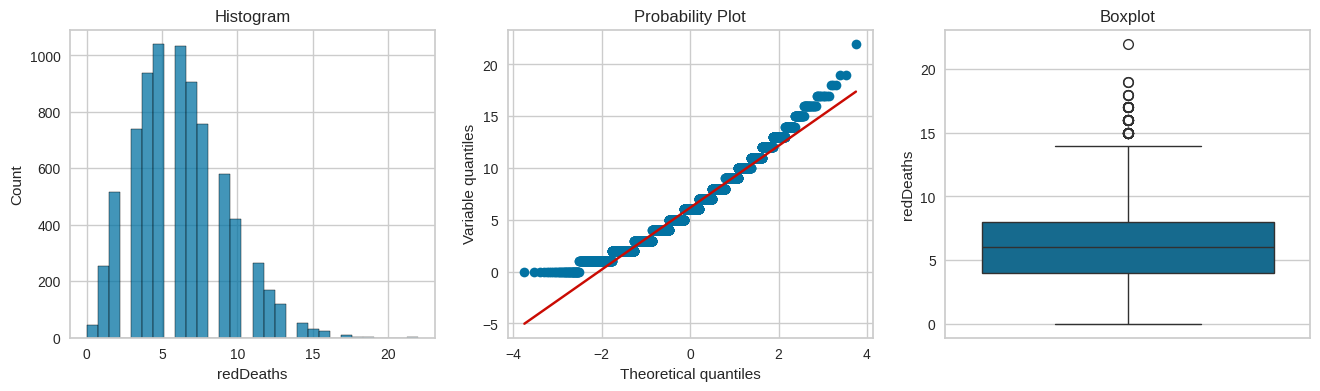

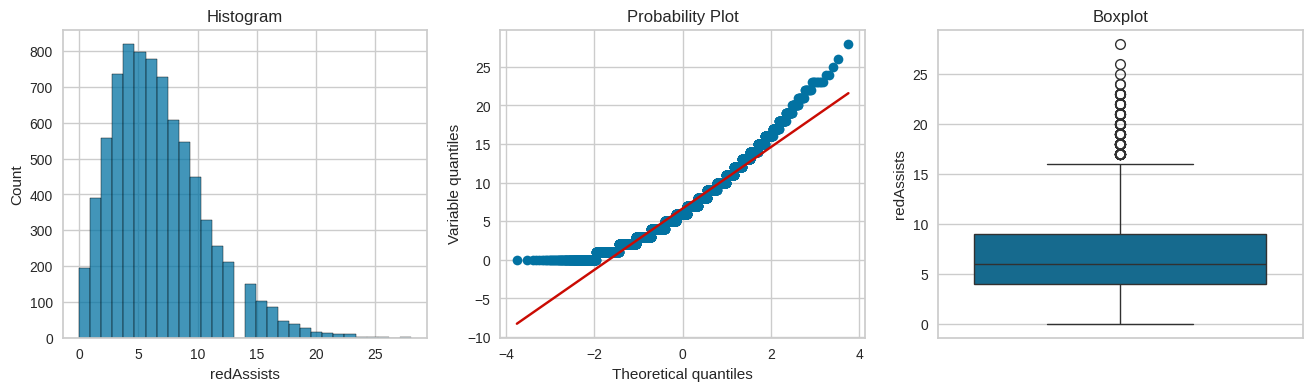

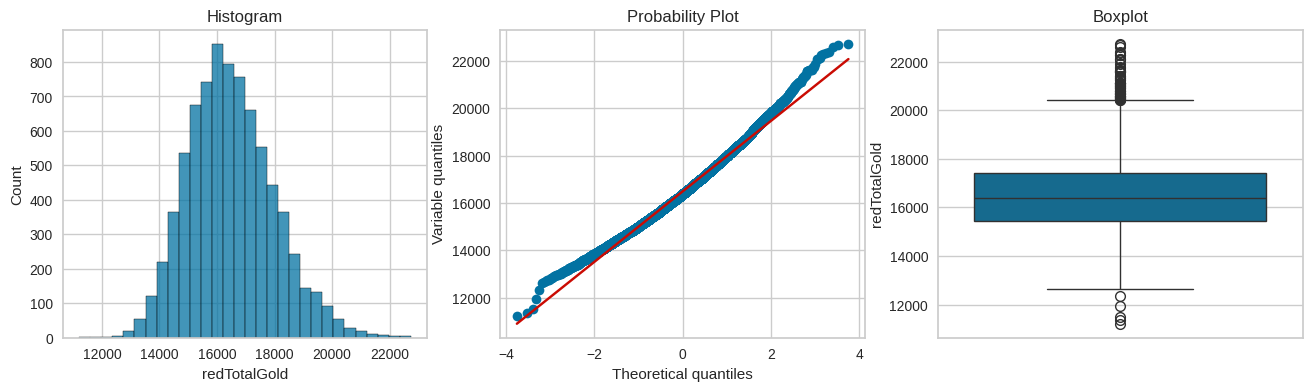

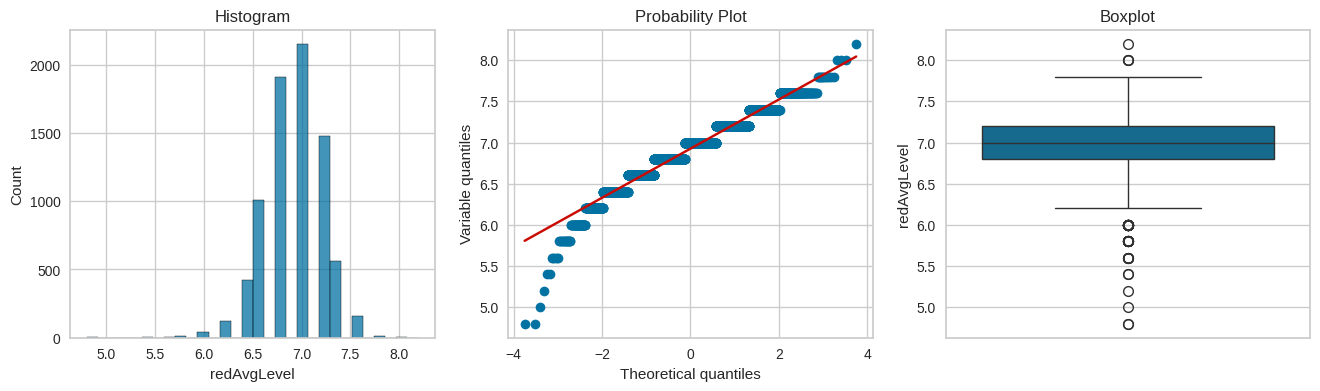

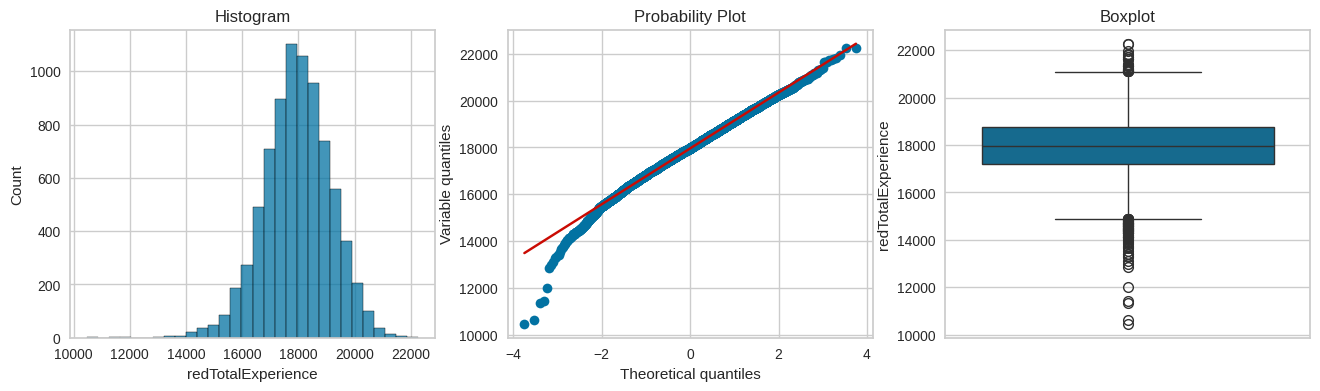

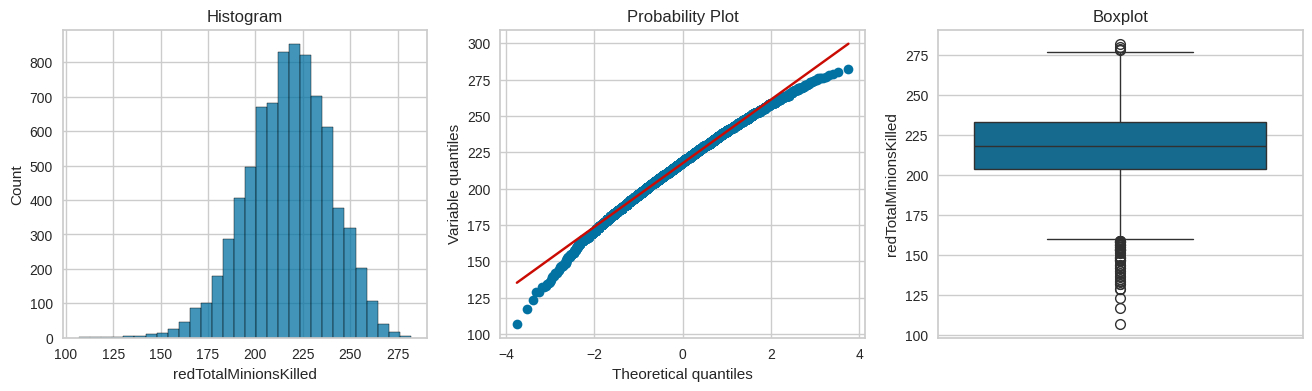

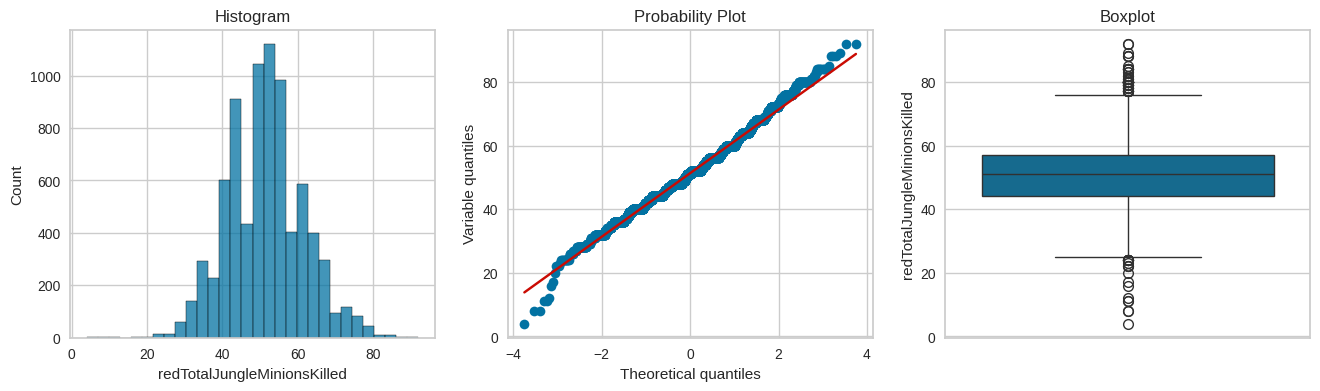

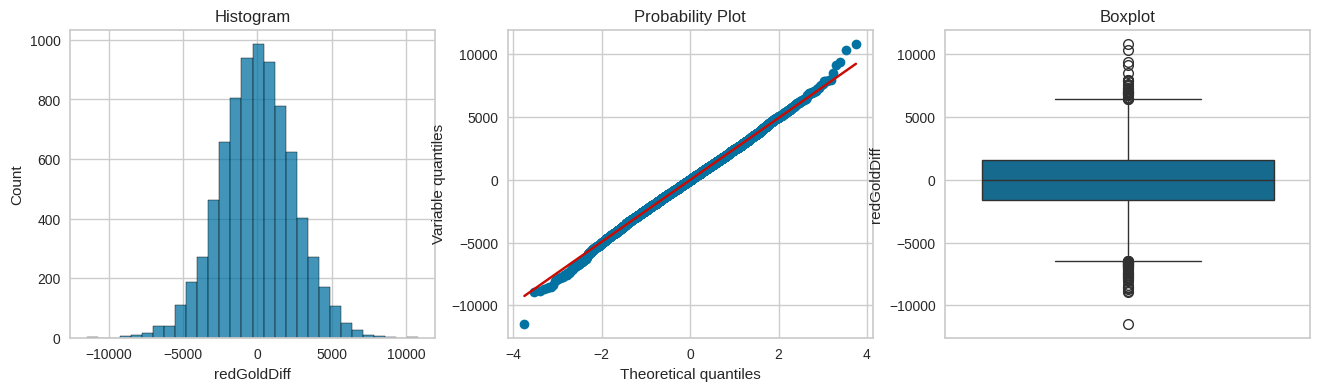

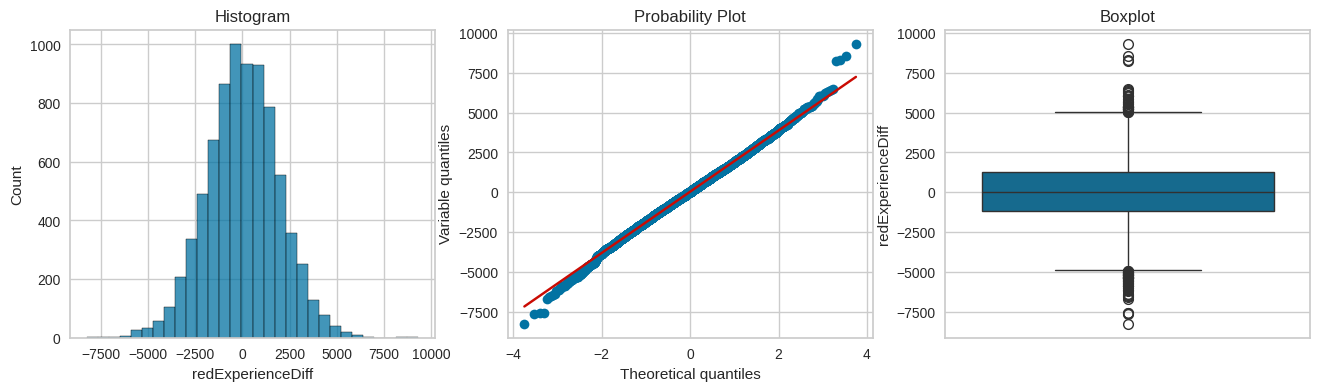

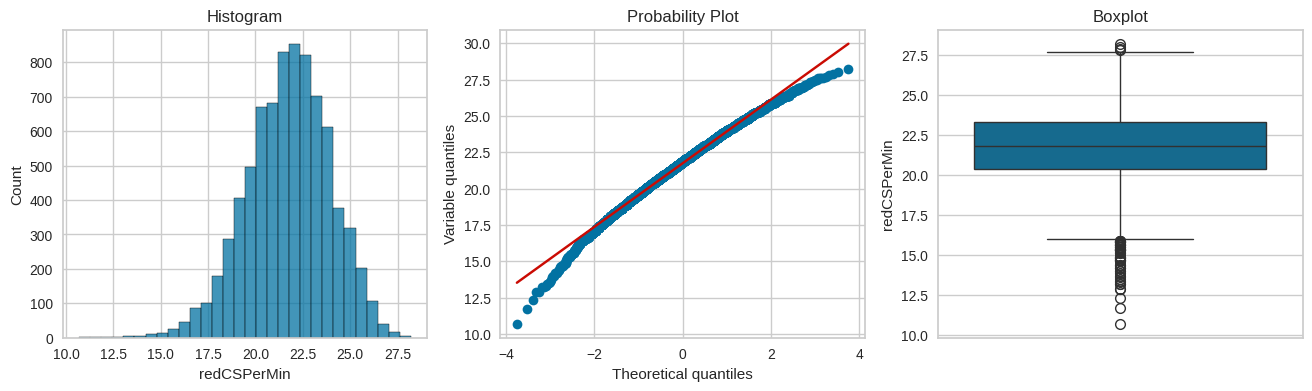

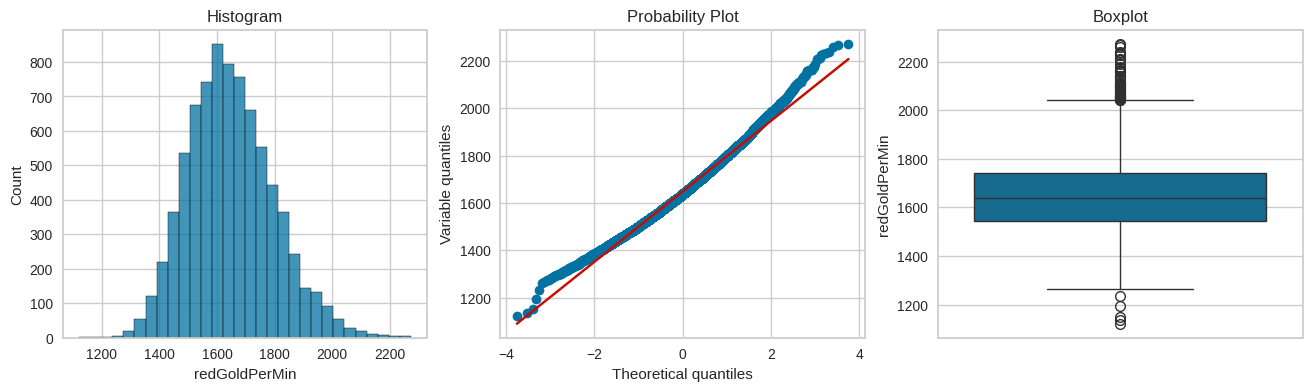

In [ ]:
# Outlier detection

plot_diagnosa(X_train, 'redWardsPlaced')
plot_diagnosa(X_train, 'redWardsDestroyed')
plot_diagnosa(X_train, 'redKills')
plot_diagnosa(X_train, 'redDeaths')
plot_diagnosa(X_train, 'redAssists')
plot_diagnosa(X_train, 'redTotalGold')
plot_diagnosa(X_train, 'redAvgLevel')
plot_diagnosa(X_train, 'redTotalExperience')
plot_diagnosa(X_train, 'redTotalMinionsKilled')
plot_diagnosa(X_train, 'redTotalJungleMinionsKilled')
plot_diagnosa(X_train, 'redGoldDiff')
plot_diagnosa(X_train, 'redExperienceDiff')
plot_diagnosa(X_train, 'redCSPerMin')
plot_diagnosa(X_train, 'redGoldPerMin')

In [ ]:
def batas_skew(df, X, distance):
    IQR = df[X].quantile(0.75) - df[X].quantile(0.25)
    lower_boundary = df[X].quantile(0.25) - (IQR * distance)
    upper_boundary = df[X].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

In [ ]:
# temukan batasan untuk blueWardsPlaced dengan Pendekatan IQR
blueWardsPlaced_upper_limit, blueWardsPlaced_lower_limit = batas_skew(X_train, 'blueWardsPlaced', 1.5)
blueWardsPlaced_upper_limit, blueWardsPlaced_lower_limit

(29.0, 5.0)

In [ ]:
# temukan batasan untuk bluWardsDestroyed dengan Pendekatan IQR
blueWardsDestroyed_upper_limit, blueWardsDestroyed_lower_limit = batas_skew(X_train, 'blueWardsDestroyed', 1.5)
blueWardsDestroyed_upper_limit, blueWardsDestroyed_lower_limit

(8.5, -3.5)

In [ ]:
# temukan batasan untuk blueDeaths dengan Pendekatan IQR
blueDeaths_upper_limit, blueDeaths_lower_limit = batas_skew(X_train, 'blueDeaths', 1.5)
blueDeaths_upper_limit, blueDeaths_lower_limit

(14.0, -2.0)

In [ ]:
# temukan batasan untuk blueAssists dengan Pendekatan IQR
blueAssists_upper_limit, blueAssists_lower_limit = batas_skew(X_train, 'blueAssists', 1.5)
blueAssists_upper_limit, blueAssists_lower_limit

(16.5, -3.5)

In [ ]:
# temukan batasan untuk blueAvgLevel dengan Pendekatan IQR
blueAvgLevel_upper_limit, blueAvgLevel_lower_limit = batas_skew(X_train, 'blueAvgLevel', 1.5)
blueAvgLevel_upper_limit, blueAvgLevel_lower_limit

(7.800000000000001, 6.199999999999999)

In [ ]:
# temukan batasan untuk redWardsPlaced dengan Pendekatan IQR
redWardsPlaced_upper_limit, redWardsPlaced_lower_limit = batas_skew(X_train, 'redWardsPlaced', 1.5)
redWardsPlaced_upper_limit, redWardsPlaced_lower_limit

(29.0, 5.0)

In [ ]:
# temukan batasan untuk redWardsDestroyed dengan Pendekatan IQR
redWardsDestroyed_upper_limit, redWardsDestroyed_lower_limit = batas_skew(X_train, 'redWardsDestroyed', 1.5)
redWardsDestroyed_upper_limit, redWardsDestroyed_lower_limit

(8.5, -3.5)

In [ ]:
# temukan batasan untuk redAssists dengan Pendekatan IQR
redAssists_upper_limit, redAssists_lower_limit = batas_skew(X_train, 'redAssists', 1.5)
redAssists_upper_limit, redAssists_lower_limit

(16.5, -3.5)

In [ ]:
# temukan batasan untuk redAvgLevel dengan Pendekatan IQR
redAvgLevel_upper_limit, redAvgLevel_lower_limit = batas_skew(X_train, 'redAvgLevel', 1.5)
redAvgLevel_upper_limit, redAvgLevel_lower_limit

(7.800000000000001, 6.199999999999999)

In [ ]:
# Mengganti masing-masing nilai outlier
X_train['blueWardsPlaced']= np.where(X_train['blueWardsPlaced'] > blueWardsPlaced_upper_limit, blueWardsPlaced_upper_limit,
                       np.where(X_train['blueWardsPlaced'] < blueWardsPlaced_lower_limit, blueWardsPlaced_lower_limit, X_train['blueWardsPlaced']))

In [ ]:
# Mengganti masing-masing nilai outlier
X_train['blueWardsDestroyed']= np.where(X_train['blueWardsDestroyed'] > blueWardsDestroyed_upper_limit, blueWardsDestroyed_upper_limit,
                       np.where(X_train['blueWardsDestroyed'] < blueWardsDestroyed_lower_limit, blueWardsDestroyed_lower_limit, X_train['blueWardsDestroyed']))

In [ ]:
# Mengganti masing-masing nilai outlier
X_train['blueDeaths']= np.where(X_train['blueDeaths'] > blueDeaths_upper_limit, blueDeaths_upper_limit,
                       np.where(X_train['blueDeaths'] < blueDeaths_lower_limit, blueDeaths_lower_limit, X_train['blueDeaths']))

In [ ]:
# Mengganti masing-masing nilai outlier
X_train['blueAssists']= np.where(X_train['blueAssists'] > blueAssists_upper_limit, blueAssists_upper_limit,
                       np.where(X_train['blueAssists'] < blueAssists_lower_limit, blueAssists_lower_limit, X_train['blueAssists']))

In [ ]:
# Mengganti masing-masing nilai outlier
X_train['blueAvgLevel']= np.where(X_train['blueAvgLevel'] > blueAvgLevel_upper_limit, blueAvgLevel_upper_limit,
                       np.where(X_train['blueAvgLevel'] < blueAvgLevel_lower_limit, blueAvgLevel_lower_limit, X_train['blueAvgLevel']))

In [ ]:
# Mengganti masing-masing nilai outlier
X_train['redWardsPlaced']= np.where(X_train['redWardsPlaced'] > redWardsPlaced_upper_limit, redWardsPlaced_upper_limit,
                       np.where(X_train['redWardsPlaced'] < redWardsPlaced_lower_limit, redWardsPlaced_lower_limit, X_train['redWardsPlaced']))

In [ ]:
# Mengganti masing-masing nilai outlier
X_train['redWardsDestroyed']= np.where(X_train['redWardsDestroyed'] > redWardsDestroyed_upper_limit, redWardsDestroyed_upper_limit,
                       np.where(X_train['redWardsDestroyed'] < redWardsDestroyed_lower_limit, redWardsDestroyed_lower_limit, X_train['redWardsDestroyed']))

In [ ]:
# Mengganti masing-masing nilai outlier
X_train['redAssists']= np.where(X_train['redAssists'] > redAssists_upper_limit, redAssists_upper_limit,
                       np.where(X_train['redAssists'] < redAssists_lower_limit, redAssists_lower_limit, X_train['redAssists']))

In [ ]:
# Mengganti masing-masing nilai outlier
X_train['redAvgLevel']= np.where(X_train['redAvgLevel'] > redAvgLevel_upper_limit, redAvgLevel_upper_limit,
                       np.where(X_train['redAvgLevel'] < redAvgLevel_lower_limit, redAvgLevel_lower_limit, X_train['redAvgLevel']))

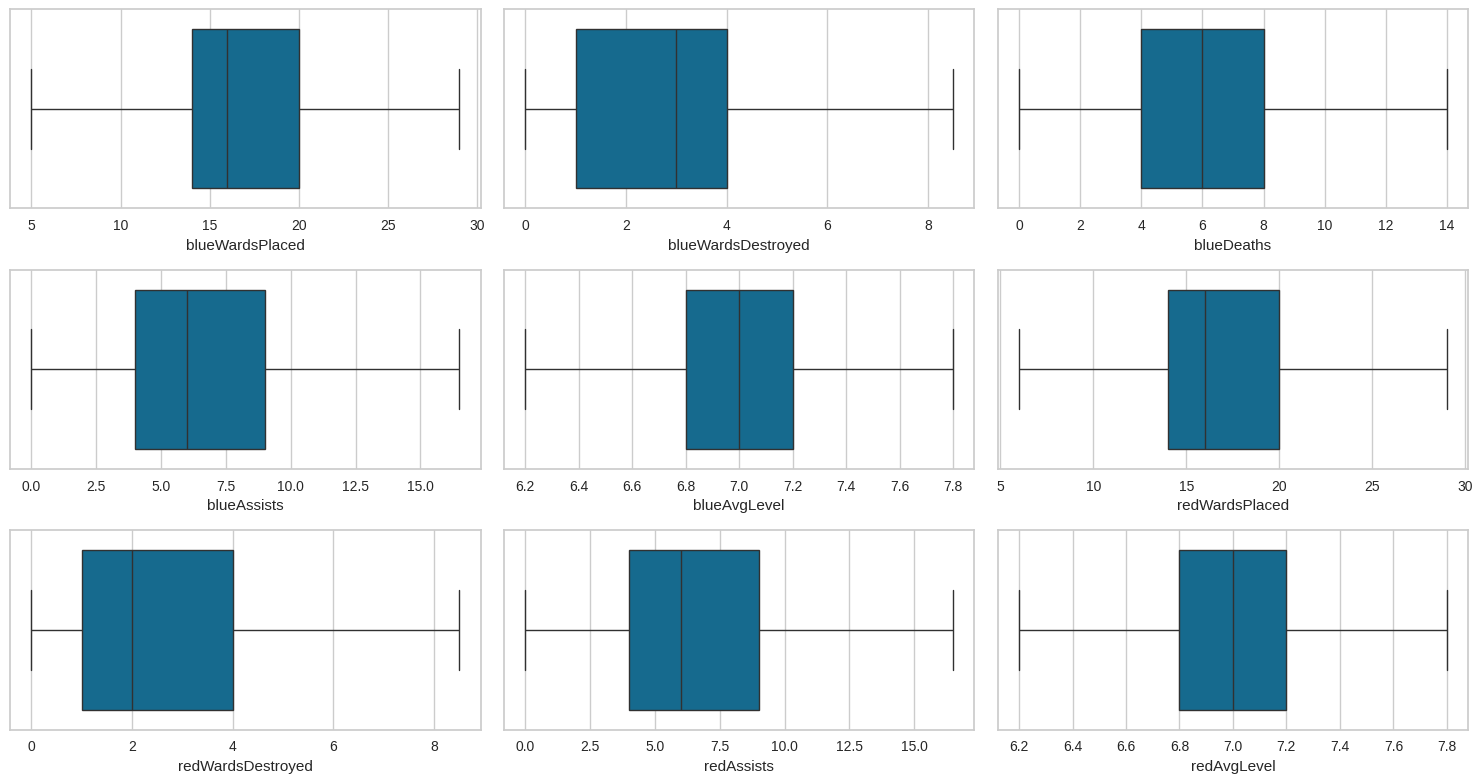

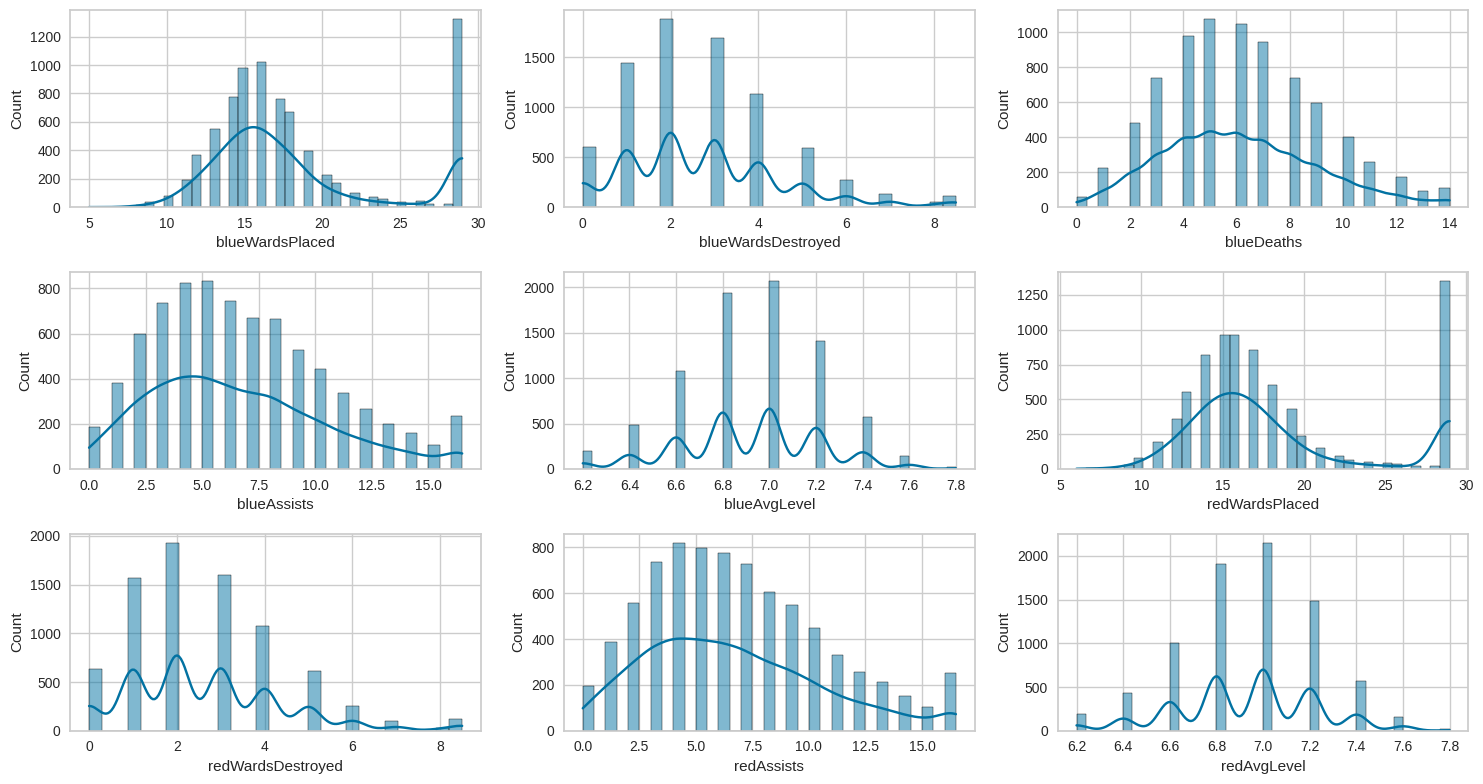

<Figure size 800x550 with 0 Axes>

In [ ]:
# Selanjutnya kita periksa kembali handling outlier yang telah dilakukan
import statsmodels.api as sm

# List fitur yang ingin diplot
fitur_list = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueDeaths', 'blueAssists', 'blueAvgLevel',
              'redWardsPlaced', 'redWardsDestroyed', 'redAssists', 'redAvgLevel']

# Plot boxplot untuk setiap fitur
plt.figure(figsize=(15, 8))
for i, fitur in enumerate(fitur_list, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=X_train, x=fitur)

plt.tight_layout()
plt.show()

# Plot histogram untuk setiap fitur
plt.figure(figsize=(15, 8))
for i, fitur in enumerate(fitur_list, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X_train[fitur], kde=True)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


pada akhirnya kita mendapatkan nilai yang terbebas dari outlier.


In [ ]:
X_train.head()

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
6392,16.0,1.0,6,8.0,10.0,1,1,0,0,15388,...,1,18465,7.0,18704,214,59,3077,3160,21.4,1846.5
6821,29.0,4.0,1,6.0,2.0,0,0,0,0,13981,...,0,16475,6.8,17749,250,44,2494,996,25.0,1647.5
5753,29.0,3.0,10,7.0,10.0,0,0,0,0,16818,...,0,16535,6.6,16511,219,38,-283,-165,21.9,1653.5
7332,13.0,3.0,4,7.0,5.0,0,0,0,0,15614,...,0,16430,6.8,17406,234,38,816,-172,23.4,1643.0
1055,15.0,2.0,4,1.0,7.0,2,1,1,0,17320,...,0,14470,6.8,17319,248,45,-2850,-1646,24.8,1447.0


# **Training Model**

Setelah melakukan Feature Engineering kita dapat melatih model yang kita bangun dengan model klasifikasi.

Penting untuk diketahui bahwa model yang pertama ini dibangun tanpa melalui proses feature engineering. Dengan kata lain, data train masih belum dilakukan ***hands on Outlier***.

In [ ]:
pip install eli5

In [ ]:
import os

#Import sklearn classes
from sklearn.model_selection import train_test_split,RepeatedKFold, cross_val_score,KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# sklearn utility to compare algorithms
from sklearn import model_selection

#Visualisation Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

import warnings
warnings.filterwarnings('ignore')

from eli5 import explain_weights, show_weights
from yellowbrick import ROCAUC
from yellowbrick.classifier import ClassificationReport

print("Imported all libraries successfully")
#print(os.listdir("../input"))

CV_N_REPEATS=20
BINS=10

Imported all libraries successfully


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7903 entries, 6392 to 7270
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWardsPlaced               7903 non-null   float64
 1   blueWardsDestroyed            7903 non-null   float64
 2   blueKills                     7903 non-null   int64  
 3   blueDeaths                    7903 non-null   float64
 4   blueAssists                   7903 non-null   float64
 5   blueEliteMonsters             7903 non-null   int64  
 6   blueDragons                   7903 non-null   int64  
 7   blueHeralds                   7903 non-null   int64  
 8   blueTowersDestroyed           7903 non-null   int64  
 9   blueTotalGold                 7903 non-null   int64  
 10  blueAvgLevel                  7903 non-null   float64
 11  blueTotalExperience           7903 non-null   int64  
 12  blueTotalMinionsKilled        7903 non-null   int64  
 13  

In [ ]:
dum=DummyClassifier(strategy='most_frequent')
dum=dum.fit(X_train,y_train)

#compute accuracy
score=dum.score(X_test, y_test)
print("Dummy Classifier Accuracy: %.2f%%" % (score * 100.0))

Dummy Classifier Accuracy: 49.75%


<Figure size 700x700 with 0 Axes>

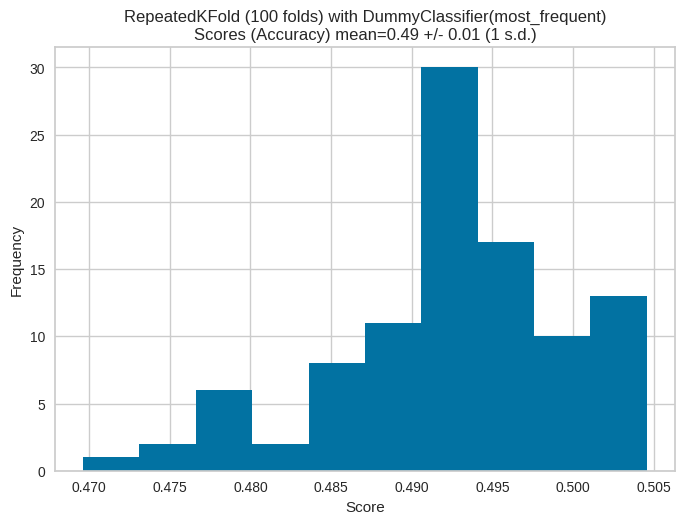

In [ ]:
strategy = "most_frequent"

scores = cross_val_score(dum,X, y,
                         cv=RepeatedKFold(n_repeats=CV_N_REPEATS),
                         scoring=None)
scores_dummy = scores.copy()

score_line = "Scores (Accuracy) mean={0:.2f} +/- {1:.2f} (1 s.d.)".format(scores.mean(),scores.std())
plt.figure(figsize=(7,7))
fig, ax = plt.subplots()
pd.Series(scores).hist(ax=ax, bins=BINS)
ax.set_title(f"RepeatedKFold ({len(scores)} folds) with DummyClassifier({strategy})\n" + score_line);
ax.set_xlabel("Score")
ax.set_ylabel("Frequency");

In [ ]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

#compute accuracy
scores = cross_val_score(knn, X, y, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
print(f"Accuracy mean={scores.mean():0.2f} +/- {scores.std():0.2f} (1 s.d.)")

Accuracy mean=0.71 +/- 0.01 (1 s.d.)


In [ ]:
dt=DecisionTreeClassifier(random_state=1, max_depth=2)
dt=dt.fit(X_train,y_train)
dt_scores = cross_val_score(dt, X, y, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
print(f"Accuracy mean={dt_scores.mean():0.2f} +/- {dt_scores.std():0.2f} (1 s.d.)")

Accuracy mean=0.72 +/- 0.01 (1 s.d.)


In [ ]:
num_estimators=100
rf = RandomForestClassifier(n_estimators=num_estimators)
rf.fit(X_train, y_train)

rf_score=rf.score(X_test, y_test)
print("Accuracy of Random Forest Classifier: {0:0.2f}".format(rf_score * 100.0));

#Make Predictions
y_pred = rf.predict(X_test)
#Plot the confusion matrix
confusion_matrix(y_pred, y_test)

Accuracy of Random Forest Classifier: 72.72


array([[728, 284],
       [255, 709]])

In [ ]:
feature_names=X_train.columns.values
show_weights(rf,feature_names=feature_names)

Weight,Feature
0.0960 ± 0.1679,redGoldDiff
0.0935 ± 0.1580,blueGoldDiff
0.0669 ± 0.1155,blueExperienceDiff
0.0600 ± 0.1132,redExperienceDiff
0.0469 ± 0.0782,blueGoldPerMin
0.0455 ± 0.0744,blueTotalGold
0.0444 ± 0.0639,redGoldPerMin
0.0443 ± 0.0683,redTotalGold
0.0418 ± 0.0435,redTotalExperience
0.0407 ± 0.0416,blueTotalExperience


Scores mean=0.72 +/- 0.01 (1 s.d.)


<Figure size 800x550 with 0 Axes>

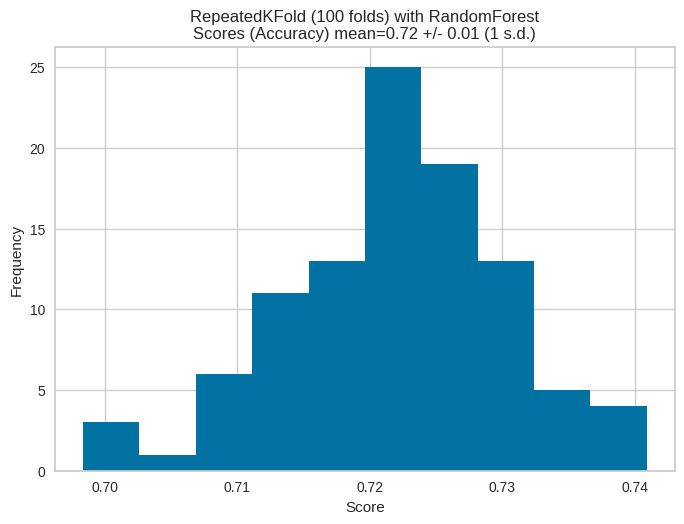

In [ ]:
scores = cross_val_score(rf, X, y, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
scores_est = scores.copy()
print(f"Scores mean={scores.mean():0.2f} +/- {scores.std():0.2f} (1 s.d.)")

score_line = f"Scores (Accuracy) mean={scores.mean():0.2f} +/- {scores.std():0.2f} (1 s.d.)"
plt.figure()
fig, ax = plt.subplots()
pd.Series(scores).hist(ax=ax, bins=BINS)
ax.set_title(f"RepeatedKFold ({len(scores)} folds) with RandomForest\n" + score_line);
ax.set_xlabel("Score")
ax.set_ylabel("Frequency");

<Figure size 800x550 with 0 Axes>

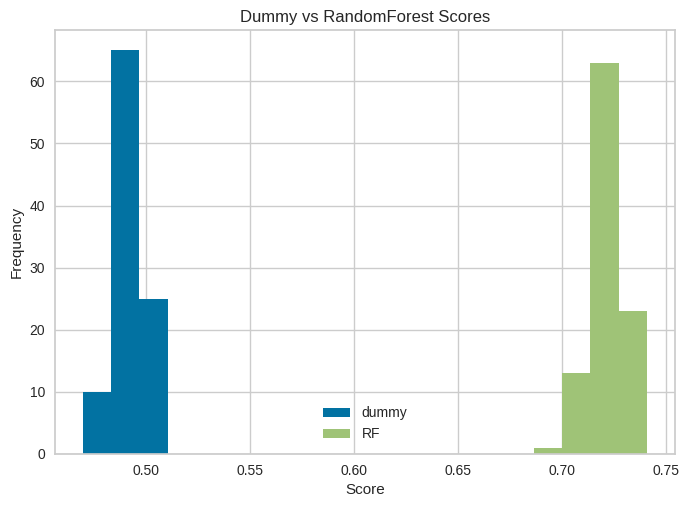

In [ ]:
plt.figure()
fig, ax = plt.subplots()
df_dummy_est_scores = pd.DataFrame({'dummy': scores_dummy, 'RF': scores_est})
df_dummy_est_scores.plot(kind='hist', ax=ax, bins=20)
ax.set_xlabel("Score")
ax.set_title("Dummy vs RandomForest Scores");

In [ ]:
from xgboost import XGBClassifier, plot_importance,to_graphviz

# fit model on training data
param = {'max_depth': 3, 'eta': 0.8, 'subsample':1, 'objective': 'binary:logistic'}
xgb = XGBClassifier(**param)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.8, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# make predictions for test data
y_pred = xgb.predict(X_test)

# evaluate predictions
xgb_score = accuracy_score(y_test, y_pred)
print("Accuracy of XGB Classifier: {0:0.2f}".format(xgb_score * 100.0));

#Plot the confusion matrix
confusion_matrix(y_pred, y_test)

Accuracy of XGB Classifier: 68.93


array([[675, 306],
       [308, 687]])

<Figure size 800x550 with 0 Axes>

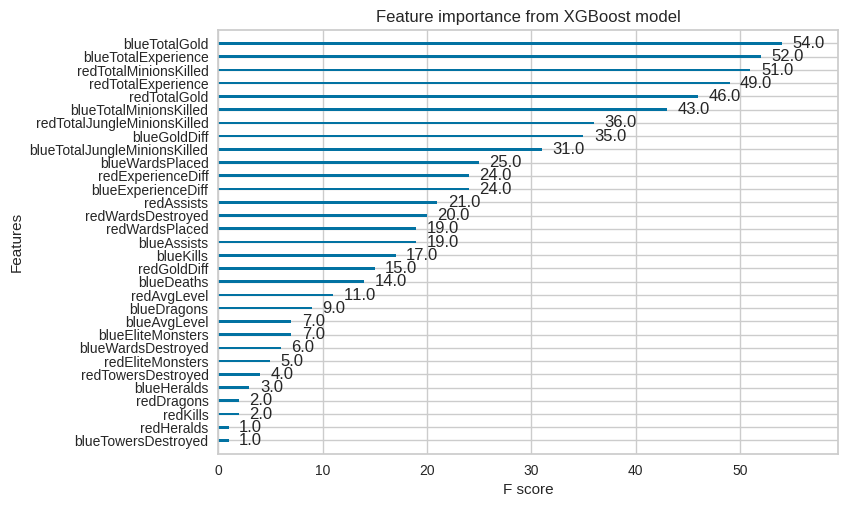

In [ ]:
# plot feature importance using built-in function
plt.figure()
plot_importance(xgb,title="Feature importance from XGBoost model")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
params={'n_estimators': 500,'learning_rate': 0.01,'max_depth': 4, 'loss':'deviance'}
gbm=GradientBoostingClassifier(**params)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, loss='deviance', max_depth=4,
                           n_estimators=500)

Text(0, 0.5, 'Deviance')

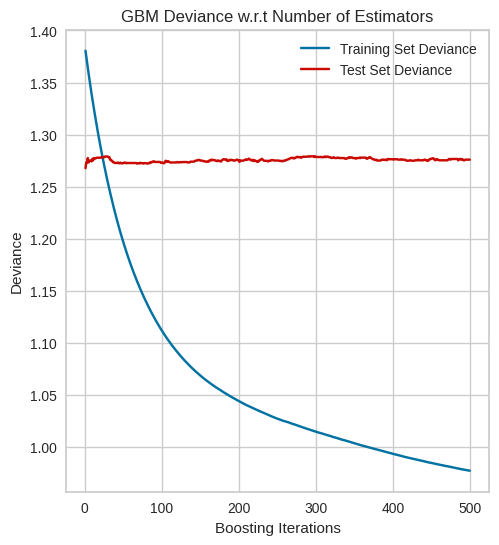

In [ ]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbm.staged_predict(X_test)):
    test_score[i] = gbm.loss_(y_test, y_pred)

#plot train and test set deviance against the number of estimators
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('GBM Deviance w.r.t Number of Estimators')
plt.plot(np.arange(params['n_estimators']) + 1, gbm.train_score_, 'b-',label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='best')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [ ]:
params={'n_estimators': 100,'learning_rate': 0.01,'max_depth': 4, 'loss':'deviance'}
gbm=GradientBoostingClassifier(**params)
gbm.fit(X_train, y_train)

# make predictions for test data
y_pred = gbm.predict(X_test)

# evaluate predictions
gbm_score = accuracy_score(y_test, y_pred)
print("Accuracy of GBM Classifier: {0:0.2f}".format(gbm_score * 100.0));

#Plot the confusion matrix
confusion_matrix(y_pred, y_test)

Accuracy of GBM Classifier: 73.03


array([[722, 272],
       [261, 721]])

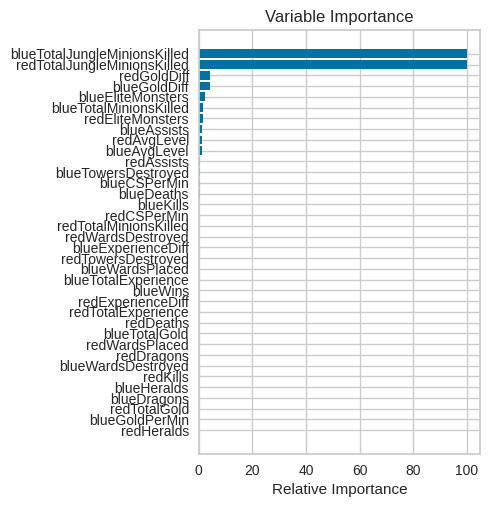

In [ ]:
feature_importance = gbm.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
from mlxtend.classifier import StackingCVClassifier

sclf = StackingCVClassifier(classifiers=[knn, rf, xgb, gbm],
                          meta_classifier=rf)

print('10-fold cross validation:\n')

for clf, label in zip([knn, rf, xgb, gbm, rf],
                      ['KNearest Neighbors',
                       'Random Forest',
                        'XGB','GBM',
                       'MetaClassifier']):

    sclf_scores = model_selection.cross_val_score(clf, X, y,
                                              cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (sclf_scores.mean(), sclf_scores.std(), label))

10-fold cross validation:

Accuracy: 0.71 (+/- 0.01) [KNearest Neighbors]
Accuracy: 0.72 (+/- 0.01) [Random Forest]
Accuracy: 0.69 (+/- 0.02) [XGB]
Accuracy: 0.73 (+/- 0.01) [GBM]
Accuracy: 0.72 (+/- 0.01) [MetaClassifier]


In [ ]:
models = []
models.append(('KNN', knn))
models.append(('DT', dt))
models.append(('RF', rf))
models.append(('XGB', xgb))

In [ ]:
results = []
names = []

for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

#Add stacking results that we got previously
results.append(np.asarray(sclf_scores))
names.append('Stacking')

KNN: 0.6985801217038541 (0.020063712809538725)
DT: 0.6922920892494928 (0.011689273455759779)
RF: 0.7109533468559837 (0.018102809063663492)
XGB: 0.6904665314401623 (0.016878413032628586)


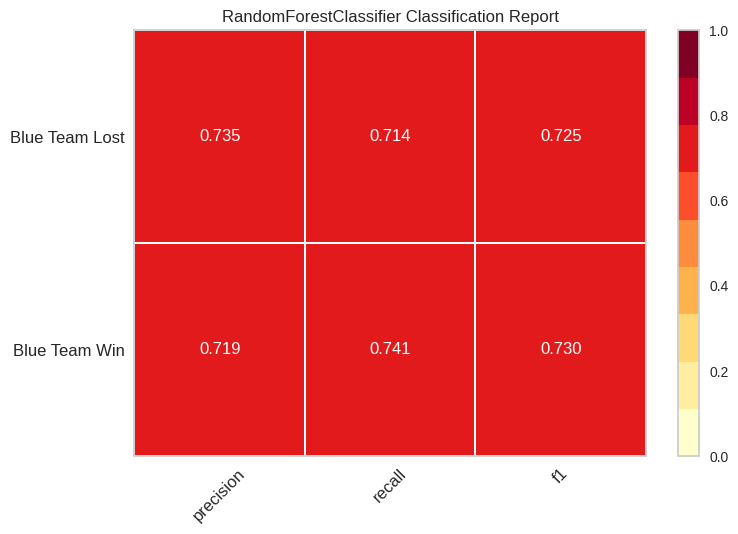

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [ ]:
visualizer = ClassificationReport(rf,classes=['Blue Team Win','Blue Team Lost'])

visualizer.fit(X_train, y_train)  # Visualisasi Fitting model
visualizer.score(X_test, y_test)   # Evaluasi model pada data test
visualizer.poof()